In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
n_samples = 1000
copula_corr = 0.6  # the Gaussian copula parameter

In [3]:
# Lognormal parameters
sev_mu = 2
sev_sigma = 0.5

# Exponential rate
arrival_lambda = 0.5

In [4]:
mean = [0, 0]
cov = [[1, copula_corr], [copula_corr, 1]]

z = np.random.multivariate_normal(mean, cov, size=n_samples)

In [5]:
u = stats.norm.cdf(z)  # each column is now ~ U(0,1), but dependent

In [6]:
# Column 0: severity
severity_samples = stats.lognorm(s=sev_sigma, scale=np.exp(sev_mu)).ppf(u[:, 0])

# Column 1: inter-arrival
interarrival_samples = stats.expon(scale=1/arrival_lambda).ppf(u[:, 1])

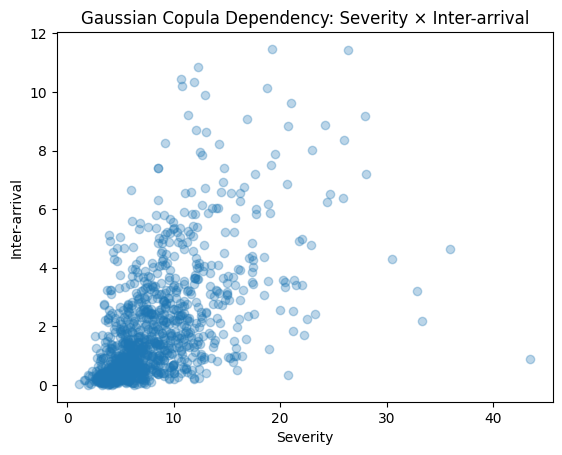

In [7]:
plt.scatter(severity_samples, interarrival_samples, alpha=0.3)
plt.xlabel('Severity')
plt.ylabel('Inter-arrival')
plt.title('Gaussian Copula Dependency: Severity × Inter-arrival')
plt.show()

### Explanation

- Each point is one simulated event.
- The X-axis is severity (e.g. claim size, loss amount), drawn from a lognormal distribution.
- The Y-axis is inter-arrival time (time between events), drawn from an exponential distribution.
- They are not independent. 
- Both marginals are skewed: most points are in the lower left corner (low severity, short gap).
- See how the cloud is stretched diagonally upwards to the right. This indicates positive dependence: higher severities tend to coincide with longer inter-arrival times. This is also known as **copula effect**.